# TAREA FINAL: Datos de vivienda

### JOSE LÓPEZ GALDÓN

<p> El negocio inmobiliario es uno de los motores de la economía de España, el carácter turístico de nuesta península hace que sean muchos los inversores extranjeros que se decidan por buscar una inversión de bajo riesgos en nuestras ciudades costeras o grandes urbes. 
Muchas de estas inversiones se hacen sobre grandes bolsas de inmuebles que deben ser analizados previamente para comprobar la rentabilidad del porfolio </p>

<!-- <p> En este caso vamos a trabajar con una tabla que contienen información de distintos inmuebles repartidos por una zona específica, sus carácterísticas y su precio </p>  -->

Todas las cuestiones se deben realizar sobre el conjunto de casos que representen viviendas ubicadas en zonas residenciales **(alta, media y baja densidad)**

**MUY IMPORTANTE:** En las otras prácticas he detectado colaboraciones involucrando varias personas y he sido flexible aunque a algunos os lo he mencionado en las correcciones, porque al final el trabajo de analista de datos es un trabajo colaborativo. Sin embargo, este trabajo es individual, así que cuidado con las colaboraciones.

Las variables de las que se compone el dataset son:

|NOMBRE VARIABLE|DESCRIPTOR|VALORES|
| --- | --- | --- |
|Order|Variable de identificación|1 a 2930|
|MS Zoning|Zona de ubicación de la vivienda|"A rural, C comercial, FV residencial flotante, I industrial, RH residencial alta densidad, RL residencial baja densidad, RM residencial media densidad"|
|Lot Frontage|Longitud de la fachada en pies||
|Lot Area|Superficie de la vivienda en pies cuadrados||
|Land Contour|Contorno del terreno circundante|"Lvl llano, Bnk Tipo bancal, HLS Ladera, Low Depresión"|
|Land Slope|Tipo de pendiente de la vivienda|" Gtl pendiente suave, Mod pendiente moderada, Sev fuerte pendiente"|
|Overall Qual|Grado de calidad de materiales y acabado de la vivienda|De 1 (Muy pobre) a 10 (Excelente)|
|Year Built|Año de construccion de la vivienda||
|Year Remod/Add|Año de última reforma de la vivienda||
|Mas Vnr Type|Tipo de revestimiento exterior|" BrkCmn Ladrillo normal, BrkFace Ladrillo visto, CBlock Bloque de cemento, None Ninguna, Stone Piedra "|
|Exter Qual|Calidad de revestimiento exterior|"Ex Excelente,Gd Bueno,TA Media,Fa Justo"|
|Bsmt Cond|Estado general del sótano|"Ex Excelente, Gd Bueno, TA Media, Fa Justo, Po Pobre,Ss sin sótano"|
|Total Bsmt SF|Superficie del sótano en pies cuadrados|
|Heating QC|Calidad de la calefacción|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre"|
|Central Air|Aire acondicionado centralizado|"N No Y Sí"|
|Full Bath|Número de baños completo en planta||
|Half Bath|Número de aseos en planta||
|Bedroom AbvGr|Número de dormitorios en planta||
|Kitchen AbvGr|Número de cocinas en planta||
|Kitchen Qual|Calidad de cocinas|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre"|
|TotRms AbvGrd|Número total de habitaciones excluidos los cuartos de baño||
|Garage Cars|Número de plazas de garaje||
|Garage Area|Superficie del garaje|||
|Garage Cond|Estado del garaje|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre,Sg sin garaje"|
|Pool Area|Superficie de la piscina en pies cuadrados|
|Pool QC|Calidad de la piscina|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Sp no hay piscina"|
|Mo Sold|mes de venta||
|Yr Sold|año de venta||
|SalePrice|precio de venta en dólares||

Recomiendo al leer los datos, eliminar espacios de los nombres de las columnas, realiza un pequeño análisis inicial de los mismos. No olvides fijarte en los tipos de variables, que variables pueden tener tipos confundidos y corrige los. Sobre todo, trabaja con las fechas.

**NOTA:** Las tareas complementarias sirven para subir nota. El resto de preguntas valen igual y suman 10 puntos.

## Inicializar y cargar el contexto spark

En primer lugar, iniciaremos spark context...

In [1]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

    # Como trabajaremos con sparksql, también lo introducimos
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

    # Funciones pyspark.sql
from pyspark.sql.functions import isnan, when, count, col, avg, udf, desc, array
from pyspark.sql.types import StringType

#### Carga de datos

Una vez tenemos spark iniciado cargamos el dataset:

In [2]:
    # Creamos un objeto con la ruta del archivo:
ruta_fichero = "./data/BDpracticafinalCSV.csv"

    # Cargamos los datos sin tratar
raw_data = sc.textFile(ruta_fichero)

    # Vemos las 5 primeras filas para ver la estructura de los datos
raw_data.take(5)

['Order;MS Zoning;Lot Frontage;Lot Area;Land Contour;Land Slope;Overall Qual;Year Built;Year Remod/Add;Mas Vnr Type;Exter Qual;Bsmt Cond;Total Bsmt SF;Heating QC;Central Air;Full Bath;Half Bath;Bedroom AbvGr;Kitchen AbvGr;Kitchen Qual;TotRms AbvGrd;Garage Cars;Garage Area;Garage Cond;Pool Area;Pool QC;Mo Sold;Yr Sold;SalePrice',
 '1;RL;141;31770;Lvl;Gtl;6;1960;1960;Stone;TA;Gd;1080;Fa;Y;1;0;3;1;TA;7;2;528;TA;0;Sp;5;2010;215000',
 '2;RH;80;11622;Lvl;Gtl;5;1961;1961;None;TA;TA;882;TA;Y;1;0;2;1;TA;5;1;730;TA;0;Sp;6;2010;105000',
 '3;RL;81;14267;Lvl;Gtl;6;1958;1958;BrkFace;TA;TA;1329;TA;Y;1;1;3;1;Gd;6;1;312;TA;0;Sp;6;2010;172000',
 '4;RL;93;11160;Lvl;Gtl;7;1968;1968;None;Gd;TA;2110;Ex;Y;2;1;3;1;Ex;8;2;522;TA;0;Sp;4;2010;244000']

In [3]:
    # Contamos los registros
raw_data.count()

2937

Como podemos observar, tenemos una cabecera en los datos que tendremos que eliminar para el parseado, además ya vemos como `;` es el separador en este fichero. Por último, tenemos 2397 registros (contando la cabecera).

In [4]:
    # Cargamos los datos con spark
raw_dataframe = spark.read.format("csv") \
                          .option("sep", ";") \
                          .option("inferSchema", "true") \
                          .option("header", "true") \
                          .load(f'{ruta_fichero}')

    # Vemos el tipo de objeto creado
print(type(raw_dataframe))

<class 'pyspark.sql.dataframe.DataFrame'>


Comprobaremos que está bien con un `take()` y un `count()`:

In [5]:
raw_dataframe.take(1)

[Row(Order=1, MS Zoning='RL', Lot Frontage=141, Lot Area=31770, Land Contour='Lvl', Land Slope='Gtl', Overall Qual=6, Year Built=1960, Year Remod/Add=1960, Mas Vnr Type='Stone', Exter Qual='TA', Bsmt Cond='Gd', Total Bsmt SF=1080, Heating QC='Fa', Central Air='Y', Full Bath=1, Half Bath=0, Bedroom AbvGr=3, Kitchen AbvGr=1, Kitchen Qual='TA', TotRms AbvGrd=7, Garage Cars=2, Garage Area=528, Garage Cond='TA', Pool Area=0, Pool QC='Sp', Mo Sold=5, Yr Sold=2010, SalePrice=215000)]

In [6]:
raw_dataframe.count()

2936

Tal y como podemos observar tenemos correctamente cargado el dataset, ya que el tamaño coincide con el original.

Según el enunciado:

*Todas las cuestiones se deben realizar sobre el conjunto de casos que representen viviendas ubicadas en zonas residenciales (alta, media y baja densidad)*

Es por ello, por lo que seleccionaremos solo las viviendas ubicadas en dichas zonas residenciales...

In [7]:
    # Primero comporbamos los distintos tipos de zonas que exsiten...
raw_dataframe.select("MS Zoning").distinct().show()

+---------+
|MS Zoning|
+---------+
|       RH|
|       FV|
|        C|
|        A|
|       Rl|
|       RL|
|       rL|
|        I|
|       RM|
+---------+



Al parecer existen 9 zonas, cuando en el diccionario aparecen 7, es por ello, que trataremos las zonas `Rl` y `rL` como zonas de baja densidad (`RL`). En nuestro caso, transformaremos estas dos zonas extras:

In [8]:
def renombrar_zona(x):
    if x == "rL":
        return "RL"
    elif x == "Rl":
        return "RL"
    else:
        return x

    # Definimos la funcion udf
renombrar_zona_udf = udf(renombrar_zona)

    # Aplicamos la funcion creando una nueva columna
raw_dataframe = raw_dataframe.withColumn("Ms Zoning", renombrar_zona_udf(raw_dataframe["Ms Zoning"]))

    # Comprobamos si ha cambiado
raw_dataframe.select("MS Zoning").distinct().show()

+---------+
|MS Zoning|
+---------+
|       RH|
|       FV|
|        C|
|        A|
|       RL|
|        I|
|       RM|
+---------+



Una vez hemos solucionado el problema de las zonas mal asignadas podemos filtrar:

In [9]:
    # Para ello, filtramos aquellos que cumplan dicha condición:
data = raw_dataframe.filter((raw_dataframe[1] == "RL") | 
                            (raw_dataframe[1] == "RM") | 
                            (raw_dataframe[1] == "RH")
                           )

    # Comprobamos si es correcto
data.select("MS Zoning").distinct().show()

+---------+
|MS Zoning|
+---------+
|       RH|
|       RL|
|       RM|
+---------+



Ahora tenemos solo esos 3 tipos de vivienda. Con el dataset final realizaremos un breve análisis exploratorio para ver el tipo de datos que tenemos.

#### EDA

In [10]:
    # Esquema de los datos
data.printSchema()

root
 |-- Order: integer (nullable = true)
 |-- Ms Zoning: string (nullable = true)
 |-- Lot Frontage: integer (nullable = true)
 |-- Lot Area: integer (nullable = true)
 |-- Land Contour: string (nullable = true)
 |-- Land Slope: string (nullable = true)
 |-- Overall Qual: integer (nullable = true)
 |-- Year Built: integer (nullable = true)
 |-- Year Remod/Add: integer (nullable = true)
 |-- Mas Vnr Type: string (nullable = true)
 |-- Exter Qual: string (nullable = true)
 |-- Bsmt Cond: string (nullable = true)
 |-- Total Bsmt SF: integer (nullable = true)
 |-- Heating QC: string (nullable = true)
 |-- Central Air: string (nullable = true)
 |-- Full Bath: integer (nullable = true)
 |-- Half Bath: integer (nullable = true)
 |-- Bedroom AbvGr: integer (nullable = true)
 |-- Kitchen AbvGr: integer (nullable = true)
 |-- Kitchen Qual: string (nullable = true)
 |-- TotRms AbvGrd: integer (nullable = true)
 |-- Garage Cars: integer (nullable = true)
 |-- Garage Area: integer (nullable = tru

In [11]:
    # Número de registros
data.count()

2768

##### Describe

A continuación, realizaremos un resumen estadístico de algunas variables numéricas interesantes en relación a las viviendas:

In [12]:
data.select("Lot Frontage", "Lot Area", "Overall Qual", "Year Built", "Year Remod/Add", "SalePrice").describe().show()

+-------+------------------+------------------+-----------------+------------------+------------------+------------------+
|summary|      Lot Frontage|          Lot Area|     Overall Qual|        Year Built|    Year Remod/Add|         SalePrice|
+-------+------------------+------------------+-----------------+------------------+------------------+------------------+
|  count|              2299|              2768|             2768|              2768|              2768|              2768|
|   mean| 69.73988690735102|10317.078034682081|6.062861271676301| 1970.282514450867|1983.5346820809248|180088.75325144507|
| stddev|23.175405359221397| 7966.366783053235|1.388561633913873|29.739898071387287|20.722726538770374| 80228.44913004969|
|    min|                21|              1300|                1|              1872|              1950|             12789|
|    max|               313|            215245|               10|              2010|              2010|            755000|
+-------+-------

De la tabla superiir podemos extraer las siguientes conclusiones:

- Se trata de viviendas con un tamaño medio de 10312 pies cuadrados, sin embargo, existe una gran desviación entre los tamaños.
- La calidad media de las viviendas es mediocre, ya que se sitúa en 6/10.
- El año de construcción medio de las viviendas es 1970, y el de reconstrucción es 1983, por lo que, a priori, a los 10-15 años las casas suelen recibir las primeras reformas importantes.
- Por último, el precio de venta medio son 180000 $

##### Valores nulos

En cuanto a los valores nulos:

In [13]:
Dict_Null = {col:data.filter(data[col].isNull()).count() for col in data.columns}
Dict_Null

{'Order': 0,
 'Ms Zoning': 0,
 'Lot Frontage': 469,
 'Lot Area': 0,
 'Land Contour': 0,
 'Land Slope': 0,
 'Overall Qual': 0,
 'Year Built': 0,
 'Year Remod/Add': 0,
 'Mas Vnr Type': 16,
 'Exter Qual': 0,
 'Bsmt Cond': 0,
 'Total Bsmt SF': 0,
 'Heating QC': 0,
 'Central Air': 0,
 'Full Bath': 0,
 'Half Bath': 0,
 'Bedroom AbvGr': 0,
 'Kitchen AbvGr': 0,
 'Kitchen Qual': 0,
 'TotRms AbvGrd': 0,
 'Garage Cars': 1,
 'Garage Area': 1,
 'Garage Cond': 2,
 'Pool Area': 0,
 'Pool QC': 0,
 'Mo Sold': 0,
 'Yr Sold': 0,
 'SalePrice': 0}

Tal y como podemos observar, tenemos 469 valores nulos en la variable `Lot Frontage`, 16 en la variable `Mas Vnr Type` y ciertos nulos en las variables relacionados con las características del garaje.

## Cuántas viviendas distintas encontramos en el dataset? ¿Se repite alguna? Tiene sentido que haya duplicadas? ¿Qué podemos hacer con las duplicadas?

Para comprobar el número de viviendas en el dataset utilizaremos la función `count()`, si queremos saber si existen viviendas duplicadas, podemos agrupar por la variable *Order* que es el identificador de la vivienda y seleccionar aquellas que se repitan más de una vez.

In [14]:
    # Contamos el número total de viviendas
f'Hay un total de {data.count()} viviendas en la base de datos.'

'Hay un total de 2768 viviendas en la base de datos.'

In [15]:
    # Agrupamos por el identificador y contamos, con la siguiente condición: muestra solo aquellas que salgan más de una vez
data.groupBy("Order").count().where("count > 1").show()

+-----+-----+
|Order|count|
+-----+-----+
| 2898|    2|
| 2930|    2|
| 2929|    2|
| 2901|    2|
| 2899|    2|
| 2900|    2|
+-----+-----+



Como podemos ver en la tabla superior existen 6 viviendas que están repetidas en el dataset. Normalmente los valores duplicados los eliminamos de las bases de datos, ya que se deben a errores.

In [16]:
data.filter((data[0] == 2898)).collect()

[Row(Order=2898, Ms Zoning='RL', Lot Frontage=None, Lot Area=11170, Land Contour='Lvl', Land Slope='Gtl', Overall Qual=7, Year Built=1990, Year Remod/Add=1991, Mas Vnr Type='None', Exter Qual='TA', Bsmt Cond='TA', Total Bsmt SF=1216, Heating QC='Ex', Central Air='Y', Full Bath=2, Half Bath=1, Bedroom AbvGr=4, Kitchen AbvGr=1, Kitchen Qual='TA', TotRms AbvGrd=8, Garage Cars=2, Garage Area=693, Garage Cond='TA', Pool Area=0, Pool QC='Sp', Mo Sold=4, Yr Sold=2006, SalePrice=250000),
 Row(Order=2898, Ms Zoning='RL', Lot Frontage=None, Lot Area=11170, Land Contour='Lvl', Land Slope='Gtl', Overall Qual=7, Year Built=1990, Year Remod/Add=1991, Mas Vnr Type='None', Exter Qual='TA', Bsmt Cond='TA', Total Bsmt SF=1216, Heating QC='Ex', Central Air='Y', Full Bath=2, Half Bath=1, Bedroom AbvGr=4, Kitchen AbvGr=1, Kitchen Qual='TA', TotRms AbvGrd=8, Garage Cars=2, Garage Area=693, Garage Cond='TA', Pool Area=0, Pool QC='Sp', Mo Sold=4, Yr Sold=2006, SalePrice=250000)]

En este caso, vemos como todos los campos son iguales para la vivienda 2898, por lo tanto se debe a un error, lo que nos llevaría a eliminar estos valores duplicados. Sin embargo, deberíamos estudiar cada caso en particular ya que puede ser que sea la misma vivienda, pero con una reforma lo que haga que cambien sus características y su precio. También puede darse el caso que una misma vivienda se venda 2 veces utilizándose el mismo identificador. Por lo tanto, puede tener sentido que existan viviendas duplicadas en el dataset, en el caso que tuviesemos la seguridad de ser un error, eliminaríamos los valores duplicados utilizando `drop()`.

## ¿Podrías decirme el total de inmuebles y el precio medio (Sale Price) de cada zona (MS Zoning)?

Para saber el total de inmuebles por zona y el precio medio de dicha zona, lo que haremos será agrupar por la variable *Ms Zoning* utilizando la función `groupBy()`.

In [17]:
    # Utilizamos la función agg() para calcular la media y contar los registros y renombramos las columnas con withColumnRenamed
data.groupBy("Ms Zoning").agg(avg("SalePrice"),
                              count("Order")) \
                         .withColumnRenamed("avg(SalePrice)", "Precio Medio") \
                         .withColumnRenamed("count(Order)", "Total Inmuebles") \
                         .show()

+---------+------------------+---------------+
|Ms Zoning|      Precio Medio|Total Inmuebles|
+---------+------------------+---------------+
|       RH|136419.77777777778|             27|
|       RL| 191412.6068451075|           2279|
|       RM|126781.39393939394|            462|
+---------+------------------+---------------+



## Media de Total Bsmt SF por cada década de construcción calculada a partir de Year Built. 

En primer lugar, definiremos una función que obtenga la década de los años, lo siguiente será modificar el formato de la variable *Year Built* para que la función creada realice la transformación. Una vez hecho esto, generaremos un nuevo dataset con la década y, por último, agruparemos por década y obtendremos la media de la superficie del sótano.

In [18]:
# Definimos la función
def decade(x):
    return x[0:3] + "0s"

    # Comprobamos que funciona
decade("1999")

'1990s'

In [19]:
    # Transformamos la columna Year Built a string
data_decada = data.withColumn("Year Built", data["Year Built"].cast(StringType()))

    # Definimos la funcion udf
decade_udf = udf(decade)

    # Aplicamos la funcion creando una nueva columna
data_decada = data_decada.withColumn("decade", decade_udf(data_decada[7]))
    
    # Comprobamos que funciona
data_decada.take(1)

[Row(Order=1, Ms Zoning='RL', Lot Frontage=141, Lot Area=31770, Land Contour='Lvl', Land Slope='Gtl', Overall Qual=6, Year Built='1960', Year Remod/Add=1960, Mas Vnr Type='Stone', Exter Qual='TA', Bsmt Cond='Gd', Total Bsmt SF=1080, Heating QC='Fa', Central Air='Y', Full Bath=1, Half Bath=0, Bedroom AbvGr=3, Kitchen AbvGr=1, Kitchen Qual='TA', TotRms AbvGrd=7, Garage Cars=2, Garage Area=528, Garage Cond='TA', Pool Area=0, Pool QC='Sp', Mo Sold=5, Yr Sold=2010, SalePrice=215000, decade='1960s')]

In [20]:
    # Por último, calculamos la media de Total Bsmt SF por decada
data_decada.groupBy("decade").avg("Total Bsmt SF") \
                             .withColumnRenamed("avg(Total Bsmt SF)", "Superficie media del sótano") \
                             .withColumnRenamed("decade", "Década de construcción") \
                             .sort(desc("Década de construcción")) \
                             .show()

+----------------------+---------------------------+
|Década de construcción|Superficie media del sótano|
+----------------------+---------------------------+
|                 2010s|                     1539.0|
|                 2000s|         1349.7657657657658|
|                 1990s|                     1138.6|
|                 1980s|                     1086.0|
|                 1970s|           953.917808219178|
|                 1960s|          1082.672268907563|
|                 1950s|          968.2955223880597|
|                 1940s|          706.9261744966443|
|                 1930s|          769.9158878504672|
|                 1920s|          833.9368421052632|
|                 1910s|          788.3009708737864|
|                 1900s|          720.1388888888889|
|                 1890s|          885.5833333333334|
|                 1880s|                      836.0|
|                 1870s|                      761.0|
+----------------------+----------------------

## ¿Cuál es la decada de construcción con viviendas mejor acondicionadas para el frío (Heating QC)?

En este caso, volveremos a utilizar el dataset creado en el anterior apartado, ya que necesitamos la década de construcción... La intención es obtener la década de construcción con mayor número de viviendas mejor acondicionadas para el frío, es decir, que poseean un aislamiento Excelente (*Ex*), es por ello, que lo primero que realizaremos será seleccionar solo aquellas viviendas que sean excelentes en cuanto a calefacción y lo siguiente será, agrupar por década, contar las viviendas con *Heating QC Excellent*, ordenarlas de manera descente y mostrar el primer registro, dicho de otra manera, la década en la que más viviendas se construyeron con un mejor acondicionamiento para el frío.

In [21]:
data_decada.filter(data_decada["Heating QC"] == "Ex") \
           .groupBy("decade") \
           .agg(count("Heating QC")) \
           .sort(desc("count(Heating QC)")) \
           .show(1)

+------+-----------------+
|decade|count(Heating QC)|
+------+-----------------+
| 2000s|              641|
+------+-----------------+
only showing top 1 row



Como podemos observar, la mejor década fue la del 2000.

## ¿Cuáles son las 10 viviendas que se vendieron por un precio más elevado por metro cuadrado en el año 2009?

Para obtener las 10 viviendas que se vendieron por un precio más elevado por metro cuadrado en el año 2009 deberemos crear una nueva columna que contenga la información de precio por metro cuadrado, en nuestro caso, llamaremos a esta variable `square_foot_price`. Una vez tenemos la nueva columna, filtraremos aquellas viviendas vendidas durante el año 2009,  ordenaremos de manera descente por el precio por metro cuadrado y seleccionaremos los 10 primeros registros.

In [22]:
    # Lo primero será crear una nueva columna que contenga la información del precio por metro cuadrado
data_precio = data.withColumn("square_meters_price", data["SalePrice"]/(data["Lot Area"]/10.764))

    # Lo siguiente será filtrar aquellas viviendas que se vendieron en el 2009 y seleccionar las 10 con un precio por metro
    # cuadrado más elevado
data_precio.filter(data_precio["Yr Sold"] == 2009) \
           .sort(desc("square_meters_price")) \
           .take(10)

[Row(Order=936, Ms Zoning='RM', Lot Frontage=24, Lot Area=1300, Land Contour='Lvl', Land Slope='Gtl', Overall Qual=6, Year Built=1980, Year Remod/Add=1980, Mas Vnr Type='None', Exter Qual='TA', Bsmt Cond='TA', Total Bsmt SF=561, Heating QC='TA', Central Air='Y', Full Bath=1, Half Bath=1, Bedroom AbvGr=2, Kitchen AbvGr=1, Kitchen Qual='TA', TotRms AbvGrd=5, Garage Cars=2, Garage Area=462, Garage Cond='TA', Pool Area=0, Pool QC='Sp', Mo Sold=5, Yr Sold=2009, SalePrice=124000, square_meters_price=1026.72),
 Row(Order=934, Ms Zoning='RM', Lot Frontage=24, Lot Area=1488, Land Contour='Lvl', Land Slope='Gtl', Overall Qual=6, Year Built=1980, Year Remod/Add=1992, Mas Vnr Type='None', Exter Qual='TA', Bsmt Cond='TA', Total Bsmt SF=561, Heating QC='TA', Central Air='Y', Full Bath=1, Half Bath=1, Bedroom AbvGr=2, Kitchen AbvGr=1, Kitchen Qual='Gd', TotRms AbvGrd=5, Garage Cars=2, Garage Area=462, Garage Cond='TA', Pool Area=0, Pool QC='Sp', Mo Sold=10, Yr Sold=2009, SalePrice=137000, square_mete

Si queremos saber solo el identificador y el precio:

In [23]:
data_precio.filter(data_precio["Yr Sold"] == 2009) \
           .select("Order", "square_meters_price") \
           .sort(desc("square_meters_price")) \
           .show(10)

+-----+-------------------+
|Order|square_meters_price|
+-----+-------------------+
|  936|            1026.72|
|  934|   991.040322580645|
|  464|  821.0634920634919|
|  935|  807.9677419354839|
|  408|  765.6535714285715|
|  407|  756.0428571428572|
|  405|              717.6|
|  933|  714.2873629544143|
|  403|  711.1928571428572|
|  411|  701.0763157894736|
+-----+-------------------+
only showing top 10 rows



## Media anual por zonas del precio de venta y metros cuadrados.

Para calcular la media del precio de venta y metros cuadrados por zonas, deberemos agrupar por estas dos variables usando un `groupBy()` y calcular la media de las variables *SalePrice* y *Lot Frontage*:

In [24]:
    # Filtramos por el año de venta y la zona y calculaos la media del precio y los pies cuadrados, luego renombramos las
    # columnas y ordenamos de manera descente por el año de venta...
data.groupBy("Yr Sold", "MS Zoning").agg(avg("SalePrice"),
                                         avg((data["Lot Area"]/10.764))) \
                                    .withColumnRenamed("avg(SalePrice)", "Precio medio") \
                                    .withColumnRenamed("avg((Lot Area / 10.764))", "Metros cuadrados medios") \
                                    .sort(desc("Yr Sold")) \
                                    .show()

+-------+---------+------------------+-----------------------+
|Yr Sold|MS Zoning|      Precio medio|Metros cuadrados medios|
+-------+---------+------------------+-----------------------+
|   2010|       RL|  184978.418972332|     1011.3513350753428|
|   2010|       RM|119681.70689655172|      586.0995784159202|
|   2010|       RH|          126280.0|      753.0286138981792|
|   2009|       RH|          116206.8|      647.1386101820885|
|   2009|       RM|118759.86904761905|       552.551715595194|
|   2009|       RL|190455.55086372362|     1002.1761598161495|
|   2008|       RL|189885.58515283844|     1047.6450695265964|
|   2008|       RH|150333.33333333334|      766.1340270035922|
|   2008|       RM| 133336.1219512195|      623.6642466759116|
|   2007|       RH|          147250.0|      651.3145670754367|
|   2007|       RL|193399.98014440434|     1059.6695831941474|
|   2007|       RM|128947.62105263158|      625.4434860842186|
|   2006|       RL|194911.28194726165|     1043.6802714

## ¿Podrías decirme el total de recaudación de las casas de revistimiento (Mas Vnr Type) de piedra con respecto a las de ladrillo? ¿Hay diferencia significativa?

Para saber si existe alguna diferencia entre la recaudación total de las casas con revestimiento de piedra (*Stone*) frente a las de la ladrillo (*BrkCmn* y *BrkFace*) realizaremos dos filtros:

El primero de ellos, contendrá las casas con revestimiento en piedra y calcularemos la suma total de los precios. Mientras que el segundo, serán las casas de ladrillo, para este también calcularemos la suma total de los precios y observaremos si exsite una diferencia significativa...

In [25]:
    # Comenzaremos por las casa de piedra
casas_piedra = data.filter(data["Mas Vnr Type"] == "Stone").select("SalePrice")

    # Calculamos la recaudación total de las casas con revestimiento de piedra
recaudacion_casas_piedra = casas_piedra.groupBy().sum() \
                                       .withColumnRenamed("sum(SalePrice)", "Recaudación viviendas en piedra")
recaudacion_casas_piedra.show()

+-------------------------------+
|Recaudación viviendas en piedra|
+-------------------------------+
|                       60495477|
+-------------------------------+



In [26]:
    # En cuanto a las casas de ladrillo:
casas_ladrillo = data.filter((data["Mas Vnr Type"] == "BrkCmn") |
                             (data["Mas Vnr Type"] == "BrkFace")) \
                     .select("SalePrice")

    # Calculamos la recaudación total de las casas con revestimiento de ladrillo
recaudacion_casas_ladrillo = casas_ladrillo.groupBy().sum() \
                                           .withColumnRenamed("sum(SalePrice)", "Recaudación viviendas en ladrillo")
recaudacion_casas_ladrillo.show()

+---------------------------------+
|Recaudación viviendas en ladrillo|
+---------------------------------+
|                        182918036|
+---------------------------------+



In [27]:
    # Obtenemos la diferencia para saber cuántas veces más se recauda
recaudacion_casas_ladrillo.join(recaudacion_casas_piedra) \
                          .withColumn("Diferencia", 
                                      recaudacion_casas_ladrillo["Recaudación viviendas en ladrillo"]/recaudacion_casas_piedra["Recaudación viviendas en piedra"]) \
                          .show()

+---------------------------------+-------------------------------+-----------------+
|Recaudación viviendas en ladrillo|Recaudación viviendas en piedra|       Diferencia|
+---------------------------------+-------------------------------+-----------------+
|                        182918036|                       60495477|3.023664661739918|
+---------------------------------+-------------------------------+-----------------+



Como podemos observar existe una diferencia significativa, ya que que la recaudación es más de 3 veces superior en las viviendas con un revestimiento en ladrillo.

## ¿Cuánto son más caras las viviendas con 2 cocinas, con 2 o más plazas de garaje que las que tienen 1 cocina y 1 plaza de garaje? Comparar medias y cuartiles de ambos casos

Para saber la diferencia de precios entre las casas con 2 cocinas y dos o más plazas de garaje frente a las que tienen una cocina y una plaza de garaje filtraremos por estas dos condiciones, es decir, crearemos un DF llamado `casas_grandes` que contenga el precio de las viviendas con dos cocinas y dos o más plazas de garaje, y realizaremos lo mismo para las viviendas con una sola cocina y una plaza de garaje, este DF lo llamaremos `casas_peq`. Una vez tenemos los precios de las viviendas podemos calcular el precio medio, de manera que compararemos estos dos precios y obtengamos cuántas veces es más cara una casa grande frente a una pequeña. 

In [28]:
    # Viviendas con 2 cocinas y con dos o más plazas de garaje
casas_grandes = data.filter((data["Kitchen AbvGr"] == 2) &
                            (data["Garage Cars"] >= 2)).select("SalePrice")

    # Obtenemos el precio medio
precio_medio_casas_grandes = casas_grandes.groupBy().agg(avg("SalePrice")) \
                                          .withColumnRenamed("avg(SalePrice)", "Precio medio casas grandes")
precio_medio_casas_grandes.show()

+--------------------------+
|Precio medio casas grandes|
+--------------------------+
|        145124.27906976745|
+--------------------------+



Como podemos observaer el precio medio de las casas grandes de 145124.27 dólares.

In [29]:
    # Cuartiles de las casas grandes
casas_grandes.approxQuantile("SalePrice", [0.25, 0.5, 0.75], 0)

[118964.0, 141000.0, 159000.0]

In [30]:
    # Viviendas con 1 cocina y con 1 plaza de garaje
casas_peq = data.filter((data["Kitchen AbvGr"] == 1) &
                            (data["Garage Cars"] == 1)).select("SalePrice")

    # Obtenemos el precio medio
precio_medio_casas_peq = casas_peq.groupBy().agg(avg("SalePrice")) \
                                      .withColumnRenamed("avg(SalePrice)", "Precio medio casas peq")
precio_medio_casas_peq.show()

+----------------------+
|Precio medio casas peq|
+----------------------+
|    128121.99337748345|
+----------------------+



El precio medio de las casas pequeñas de 128121.99 dólares.

In [31]:
    # Cuartiles de las casas grandes
casas_peq.approxQuantile("SalePrice", [0.25, 0.5, 0.75], 0)

[111500.0, 128000.0, 142125.0]

In [32]:
    # Obtenemos la diferencia para saber cuántas veces más caras son las casas grandes
precio_medio_casas_grandes.join(precio_medio_casas_peq) \
                          .withColumn("Diferencia", 
                                      precio_medio_casas_grandes["Precio medio casas grandes"]/precio_medio_casas_peq["Precio medio casas peq"]) \
                          .show()

+--------------------------+----------------------+------------------+
|Precio medio casas grandes|Precio medio casas peq|        Diferencia|
+--------------------------+----------------------+------------------+
|        145124.27906976745|    128121.99337748345|1.1327038804508018|
+--------------------------+----------------------+------------------+



Como podemos observar la diferencia entre las viviendas es de un 13%.

## (COMPLEMENTARIA) Estudiar la relación entre el precio y el número de Garajes. (Recomiendo segmentar precio por cuartiles y estudiar el número de casos coincidentes)

Si queremos estudiar la relación existente entre el precio y las plazas de garaje de las viviendas, podemos estudiar dicha relación mediante la correlación de pearson, para ello, utilizaremos la función `stat.coor()` del paquete `ml.stat`. Además plotearemos el resultado con un scatter plot.

In [33]:
from pyspark.ml.stat import Correlation
data.stat.corr("Garage Cars", "SalePrice")

0.6456766716984054

Como podemos observar tenemos una correlación de 0.64, lo cual nos indica que puede existe cierta relación entre el precio de venta y el número de garajes, esto tiene sentido, ya que cuatas más plazas de garaje tiene una casa su precio suele aumentar. Para verlo con más claridad podemos realizar un diagrama de dispersión:

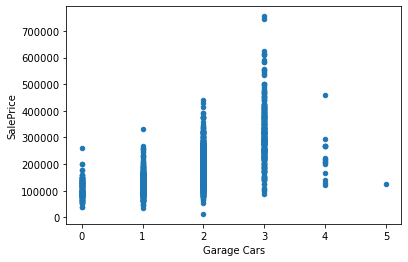

In [34]:
    # Importamos pandas
import pandas as pd
    
    # Pasamos el dataset anterior a formato pantas para plotearlo
pandas_dataset = data.toPandas()

    # Ploteamos el scatterplot
pandas_dataset.plot.scatter(x="Garage Cars", y="SalePrice");

Como vemos existe una relación entre el precio y los garajes... Aun así, segmentaremos por cuartiles para ver si ocurre esto entre las distintas franjas de precios:

In [35]:
    # Obtenemos los precios por cuartiles:
data.approxQuantile("SalePrice", [0.25, 0.5, 0.75], 0)

[129000.0, 159000.0, 212000.0]

`Primer cuartil: precio inferior a 129000`

In [36]:
    # Filtramos las viviendas con un precio inferior a 129000
data.filter(data["SalePrice"] < 129000).stat.corr("Garage Cars", "SalePrice")

0.25011221883816237

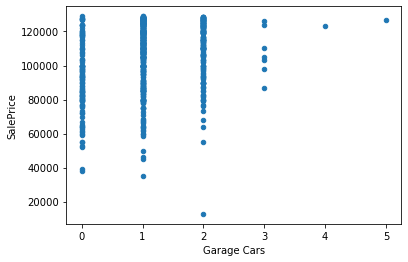

In [37]:
    # Pasamos el dataset anterior a formato pantas para plotearlo
pandas_dataset = data.filter(data["SalePrice"] < 129000).toPandas()

    # Ploteamos el scatterplot
pandas_dataset.plot.scatter(x="Garage Cars", y="SalePrice");

En este caso vemos como la correlación es muy baja, por lo tanto, en casas de precios bajos no se producirá esta relación.

`Segundo cuartil: precio entre 129000 y 159000`

In [38]:
    # Filtramos las viviendas con los precios establecidos
data.filter((129000 < data["SalePrice"]) & (data["SalePrice"] < 159000)).stat.corr("Garage Cars", "SalePrice")

0.18281911444239085

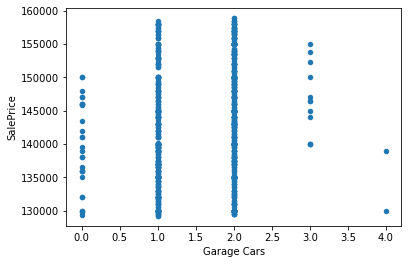

In [39]:
    # Pasamos el dataset anterior a formato pantas para plotearlo
pandas_dataset = data.filter((129000 < data["SalePrice"]) & (data["SalePrice"] < 159000)).toPandas()

    # Ploteamos el scatterplot
pandas_dataset.plot.scatter(x="Garage Cars", y="SalePrice");

En esta banda de precios ocurre los mismo, podemos ver como casi todas las viviendas comprendidas entre 130000 y 160000 dólares tienen una o dos plazas de garaje.

`Tercer cuartil: precio entre 159000 y 212000`

In [40]:
    # Filtramos las viviendas con los precios establecidos
data.filter((159000 < data["SalePrice"]) & (data["SalePrice"] < 212000)).stat.corr("Garage Cars", "SalePrice")

0.17319082711225858

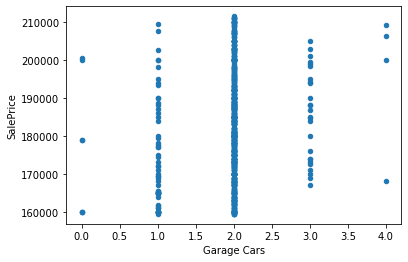

In [41]:
    # Pasamos el dataset anterior a formato pantas para plotearlo
pandas_dataset = data.filter((159000 < data["SalePrice"]) & (data["SalePrice"] < 212000)).toPandas()

    # Ploteamos el scatterplot
pandas_dataset.plot.scatter(x="Garage Cars", y="SalePrice");

En este caso, podemos ver como las casas con precios entre 160000 dólares y 210000 dólares suelen tener dos plazas de garaje, lo que produce que la correlación sea prácticamente nula.

`Cuarto cuartil: precio superior a 212000`

In [42]:
    # Filtramos las viviendas con los precios establecidos
data.filter((data["SalePrice"] > 212000)).stat.corr("Garage Cars", "SalePrice")

0.4511001505759936

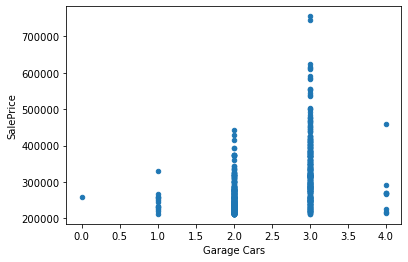

In [43]:
    # Pasamos el dataset anterior a formato pantas para plotearlo
pandas_dataset = data.filter((data["SalePrice"] > 212000)).toPandas()

    # Ploteamos el scatterplot
pandas_dataset.plot.scatter(x="Garage Cars", y="SalePrice");

En este caso si vemos una clara correlación, ya que las casas más caras, las que superan el medio millón de dólares son las que suelen tener más de dos plazas de garaje.

## (COMPLEMENTARIA) Las 10 viviendas con mejores servicios y mejor precio.

### Pista:
#### Calcula las variables: 
- Número de servicios excelentes
- Número de servicios buenos
...

#### Tendréis que tener en cuenta también variables como número de baños Full Bath, cocinas Kitchen AbvGr o dormitorios Bedroom AbvGr. Generando por ejemplo (número de estas variables por encima de media)

#### Finalmente precio de venta

***

In [44]:
    # Finalizamos spark context
sc.stop()